/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


      Category  Median       Mean  Mode  Standard Deviation
0          Age    65.0  65.140194  60.0           13.255523
1  Final Worth     2.3   4.623788   1.2         9832.378217


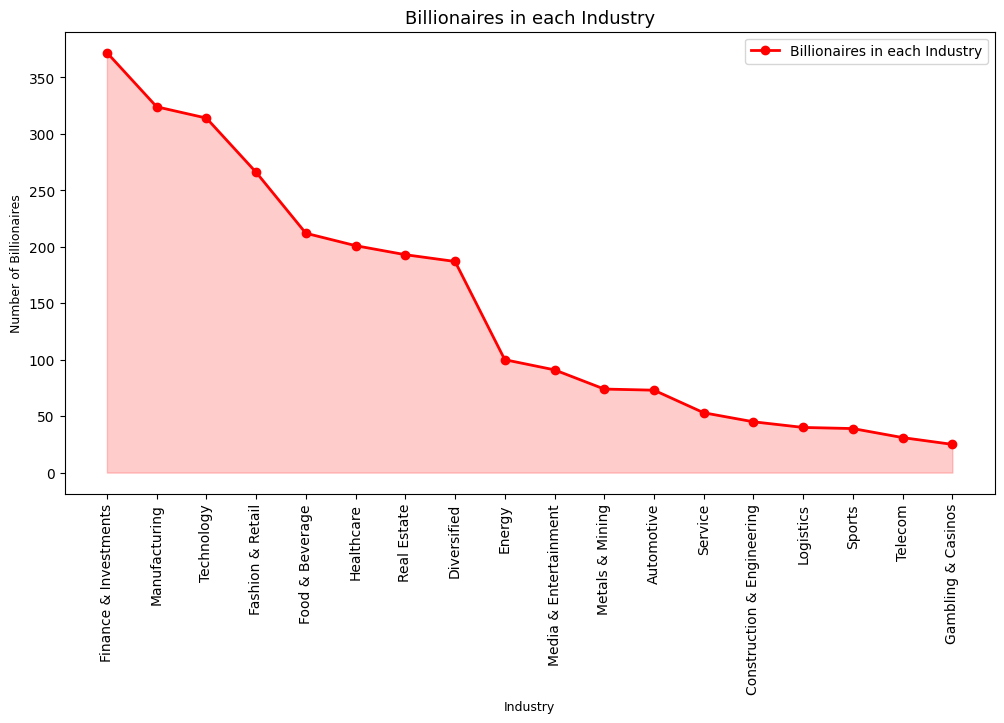

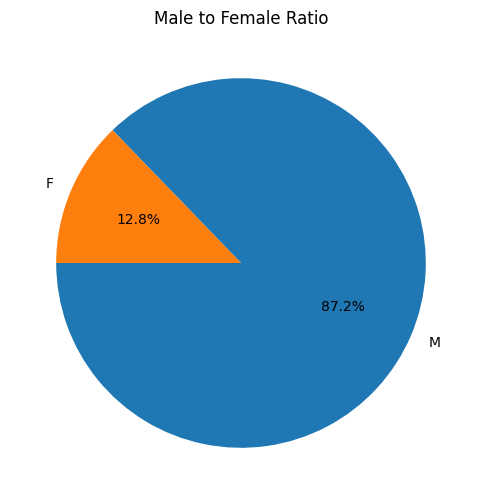

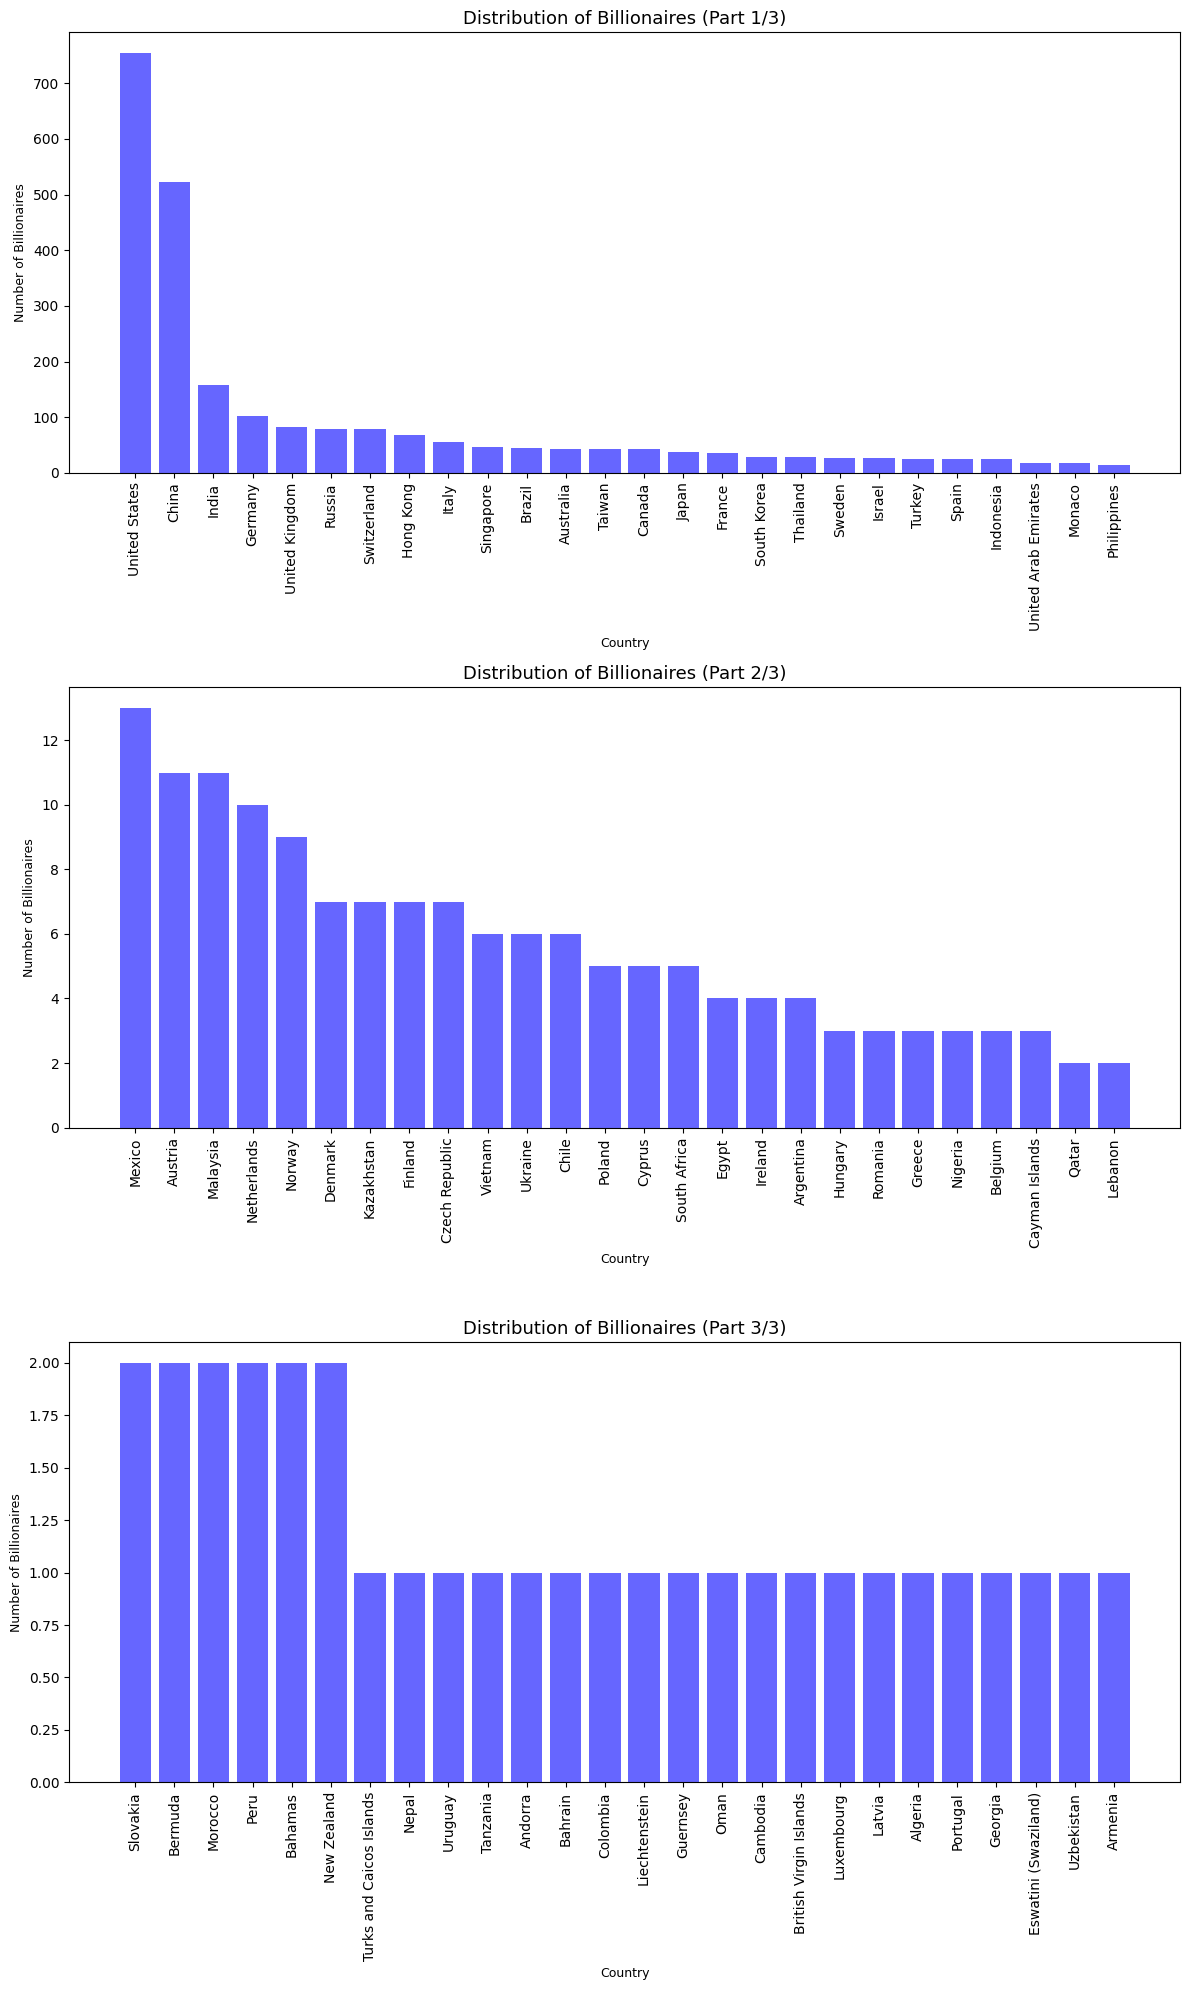

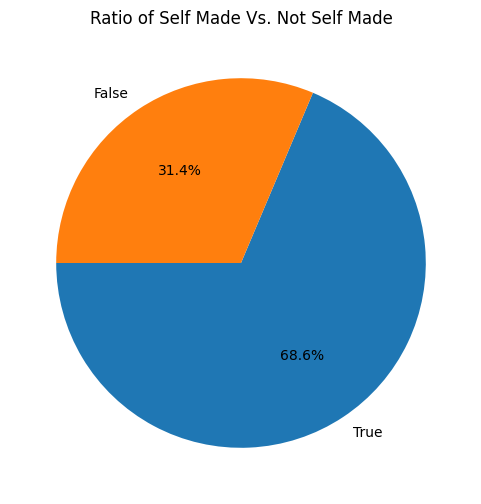

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_csv(file_path)

def plot_industry_distribution(data):
    counts = data['industries'].value_counts()
    counts_df = counts.reset_index()
    counts_df.columns = ['Value', 'Count']

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(counts_df['Value'], counts_df['Count'], label='Billionaires in each Industry', marker='o', linestyle='-', color='r', linewidth=2)
    ax.fill_between(counts_df['Value'], 0, counts_df['Count'], alpha=0.2, color='r')
    ax.set_xlabel('Industry', fontsize=9)
    ax.set_ylabel('Number of Billionaires', fontsize=9)
    ax.set_title('Billionaires in each Industry', fontsize=13)
    ax.tick_params(axis='x', rotation=90)
    ax.legend()
    return fig, ax

def plot_gender_distribution(data):
    counts_forgender_pichart = data['gender'].value_counts()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(counts_forgender_pichart, labels=counts_forgender_pichart.index, autopct='%1.1f%%', startangle=180)
    ax.set_title('Male to Female Ratio')
    return fig, ax

def plot_country_distribution(data):
    counts_country = data['country'].value_counts()
    country_df = counts_country.reset_index()
    country_df.columns = ['Country', 'Count']

    # Split the data into three parts
    num_subplots = 3
    data_split = np.array_split(country_df, num_subplots)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 20))  # Adjust the figure size as needed

    for i, ax in enumerate(axes):
        country_part = data_split[i]
        ax.bar(country_part['Country'], country_part['Count'], alpha=0.6, color='b')
        ax.set_xlabel('Country', fontsize=9)
        ax.set_ylabel('Number of Billionaires', fontsize=9)
        ax.set_title(f'Distribution of Billionaires (Part {i + 1}/{num_subplots})', fontsize=13)
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()  # Adjust subplot spacing

    return fig, axes

def plot_selfmade_distribution(data):
    selfmade_counts = data['selfMade'].value_counts()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(selfmade_counts, labels=selfmade_counts.index, autopct='%1.1f%%', startangle=180)
    ax.set_title('Ratio of Self Made Vs. Not Self Made')
    return fig, ax

def calculate_statistics(data):
    age_median = data['age'].median()
    age_mean = data['age'].mean()
    age_mode = data['age'].mode().iloc[0]
    age_standDev = np.std(data['age'])

    worth_median = data['finalWorth'].median() / 1000
    worth_mean = data['finalWorth'].mean() / 1000
    worth_mode = data['finalWorth'].mode().iloc[0] / 1000
    worth_standDev = np.std(data['finalWorth'])

    stats_df = pd.DataFrame({
        'Category': ['Age', 'Final Worth'],
        'Median': [age_median, worth_median],
        'Mean': [age_mean, worth_mean],
        'Mode': [age_mode, worth_mode],
        'Standard Deviation': [age_standDev, worth_standDev]
    })

    return stats_df

if __name__ == "__main__":
    # Load data
    billion_stats = load_data('/Users/nandolessard/Desktop/Billionare Stats/Billionaires Statistics Dataset.csv')

    # Plot industry distribution
    fig1, ax1 = plot_industry_distribution(billion_stats)
    fig1.savefig('industry_distribution.png')  # Save the figure as an image file

    # Plot gender distribution
    fig2, ax2 = plot_gender_distribution(billion_stats)
    fig2.savefig('gender_distribution.png')  # Save the figure as an image file

    # Plot country distribution
    fig3, ax3 = plot_country_distribution(billion_stats)
    fig3.savefig('country_distribution.png')  # Save the figure as an image file

    # Plot self-made distribution
    fig4, ax4 = plot_selfmade_distribution(billion_stats)
    fig4.savefig('selfmade_distribution.png')  # Save the figure as an image file

    # Calculate and print statistics
    stats = calculate_statistics(billion_stats)
    print(stats)


    # Display the plots
    plt.show()